In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
import sys, os
import glob
import warnings
sys.path.append('../')

In [30]:
import numpy as np

import pandas

from sklearn.metrics import average_precision_score as aps
import matplotlib.pyplot as plt

from rankutils.drawing import colors_from_cmap

In [48]:
def get_eval(labels):
    
    n, k = labels.shape
    
    order = np.arange(k, 0, -1)
    
    ap = np.zeros(n, dtype=np.float32)
    patk = np.zeros(n, dtype=np.float32)
    
    for i, l in enumerate(labels):
        
        v = aps(l, order, pos_label=1)
        if not np.isnan(v):
            ap[i] = v
            
        patk[i] = np.mean(l)
        
        
    return ap, patk
    

In [25]:
def draw_corr_map(x, y, name_x, name_y, ax):
    
    ax.scatter(x, y, marker='+', color=colors_from_cmap('inferno', 1 - np.abs(x-y), bounds=(0.2, 0.8)), alpha=1.0)
    
    ax.set_ylim(bottom=-0.05, top=1.05)
    ax.set_yticks([y for y in np.arange(0, 1.1, 0.1)])
    ax.set_ylabel(name_y, fontdict=dict(fontsize=12))

    ax.set_xlim(left=-0.05, right=1.05)
    ax.set_xticks([x for x in np.arange(0, 1.1, 0.1)])
    ax.set_xlabel(name_x, fontdict=dict(fontsize=12))
    
    return

In [54]:
pred_y = np.load('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/output/out.v2/oxford/005.vgg16-L2/single-learn.0001.irp.clust-diff-64.single.svc/oxford_005_5rounds2splits_top10_irp.npy')
gt_y = np.load('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-labels/label.v2/oxford/oxford.005.vgg16-L2.irp_lbls.npy')

k = 10
s = 1

r = pred_y.shape[0]

In [55]:
gt_ap, gt_patk = get_eval(gt_y[:, s:k])

pred_ap_list = []
pred_patk_list = []

for i in range(r):
    pred_ap, pred_patk = get_eval(pred_y[i, :, s:k])
    pred_ap_list.append(pred_ap)
    pred_patk_list.append(pred_patk)
    
pred_ap_mean = np.vstack(pred_ap_list).mean(axis=0)
pred_patk_mean = np.vstack(pred_patk_list).mean(axis=0)

/home/alberto/miniconda3/envs/albpy/lib/python3.6/site-packages/sklearn/metrics/ranking.py:526: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [56]:
data = {'Groundtruth AP':gt_ap,
        'Round 1 AP':pred_ap_list[0],
        'Round 2 AP':pred_ap_list[1],
        'Round 3 AP':pred_ap_list[2],
        'Round 4 AP':pred_ap_list[3],
        'Round 5 AP':pred_ap_list[4]}
        
df = pandas.DataFrame(data)
print(df.describe())
df

       Groundtruth AP  Round 1 AP  Round 2 AP  Round 3 AP  Round 4 AP  \
count       55.000000   55.000000   55.000000   55.000000   55.000000   
mean         0.779133    0.818182    0.781818    0.745455    0.890909   
std          0.314081    0.389249    0.416818    0.439620    0.314627   
min          0.000000    0.000000    0.000000    0.000000    0.000000   
25%          0.683333    1.000000    1.000000    0.500000    1.000000   
50%          0.916667    1.000000    1.000000    1.000000    1.000000   
75%          1.000000    1.000000    1.000000    1.000000    1.000000   
max          1.000000    1.000000    1.000000    1.000000    1.000000   

       Round 5 AP  
count   55.000000  
mean     0.836364  
std      0.373355  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


,Groundtruth AP,Round 1 AP,Round 2 AP,Round 3 AP,Round 4 AP,Round 5 AP
0,0.700000,0.0,0.0,0.0,0.0,1.0
1,0.892857,0.0,1.0,1.0,1.0,1.0
2,1.000000,1.0,1.0,1.0,1.0,1.0
3,1.000000,1.0,1.0,1.0,1.0,1.0
4,0.925000,1.0,1.0,1.0,1.0,1.0
5,0.500000,1.0,1.0,1.0,1.0,1.0
6,0.579861,1.0,0.0,0.0,1.0,1.0
7,0.500000,0.0,0.0,0.0,0.0,0.0
8,0.805556,1.0,1.0,0.0,1.0,1.0
9,0.875000,1.0,1.0,1.0,1.0,1.0


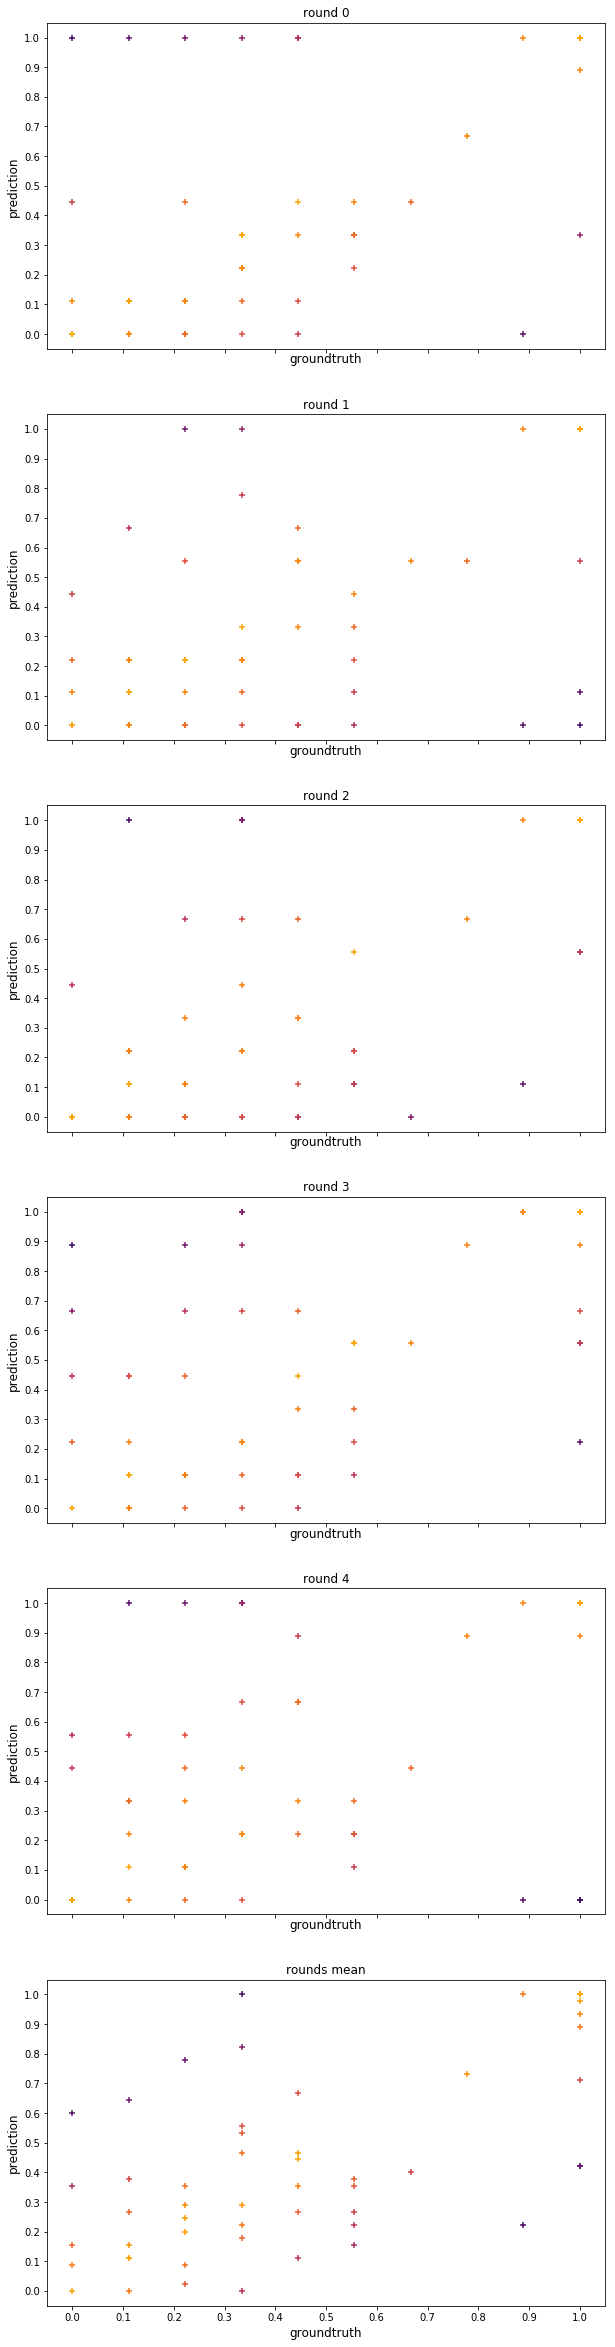

In [59]:
fig, axes = plt.subplots(r+1, 1, sharey=True, sharex=True)
axes = axes.reshape(-1)
fig.set_size_inches((10, (r+1)*7))

for i in range(r):
    
    axes[i].set_title('round {0:d}'.format(i))
    draw_corr_map(gt_patk, pred_patk_list[i], 'groundtruth', 'prediction', axes[i])
    
axes[-1].set_title('rounds mean'.format(i))
draw_corr_map(gt_patk, pred_patk_mean, 'groundtruth', 'prediction', axes[-1])